Sample data:
   temperature  vibration       load         failure_type
0    94.967142   0.639936  39.872326  lubrication_failure
1    93.617357   0.592463  47.832220          overheating
2    96.476885   0.505963  38.113701  lubrication_failure
3   105.230299   0.435306  45.380577  lubrication_failure
4    72.658466   0.869822  21.595780         bearing_wear


2025-05-02 18:47:17,211 - INFO - Model training completed in 0.28 seconds.
2025-05-02 18:47:17,225 - INFO - Model Accuracy: 54.50%


Classification Report:
                      precision    recall  f1-score   support

       bearing_wear       0.65      0.72      0.68        39
lubrication_failure       0.35      0.33      0.34        48
       misalignment       0.72      0.59      0.65        58
        overheating       0.48      0.56      0.52        55

           accuracy                           0.55       200
          macro avg       0.55      0.55      0.55       200
       weighted avg       0.55      0.55      0.55       200



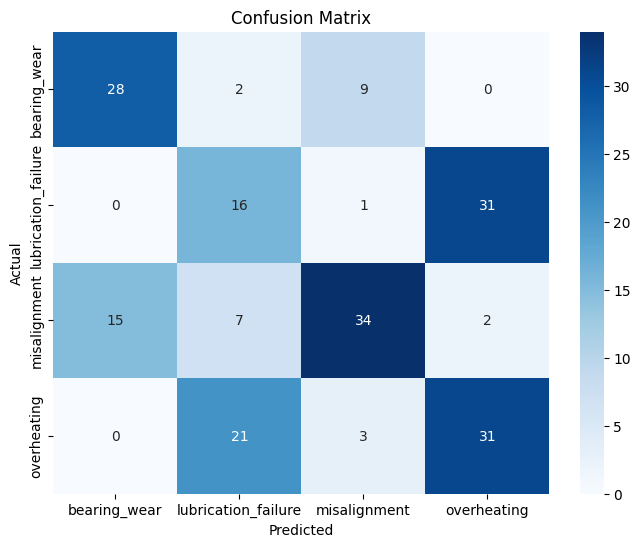

2025-05-02 18:47:17,533 - INFO - Event 1: {'temperature': 75.53019531577891, 'vibration': 0.8189249991287582, 'load': 55.856454621309254} => Predicted Failure: bearing_wear (Latency: 6.48 ms)
2025-05-02 18:47:17,543 - INFO - Event 2: {'temperature': 106.84081775929337, 'vibration': 0.527584253230689, 'load': 68.65726029804233} => Predicted Failure: overheating (Latency: 7.63 ms)
2025-05-02 18:47:17,559 - INFO - Event 3: {'temperature': 93.4040700159933, 'vibration': 0.7235228026605898, 'load': 42.47038803387355} => Predicted Failure: lubrication_failure (Latency: 14.62 ms)
2025-05-02 18:47:17,574 - INFO - Event 4: {'temperature': 97.48490788918355, 'vibration': 0.8268299760542337, 'load': 51.655019975003015} => Predicted Failure: overheating (Latency: 11.35 ms)
2025-05-02 18:47:17,586 - INFO - Event 5: {'temperature': 119.50800632232955, 'vibration': 0.6445247348192195, 'load': 62.92347848433544} => Predicted Failure: overheating (Latency: 9.90 ms)
2025-05-02 18:47:17,596 - INFO - Even

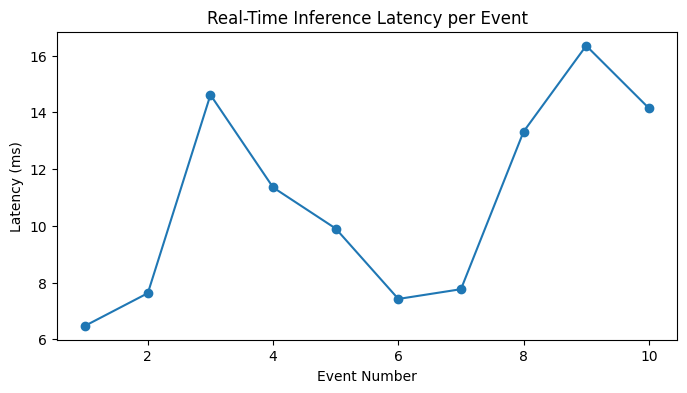

In [2]:
import pandas as pd
import numpy as np
import time
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# 1️ Generate sample dataset
def generate_sample_data(num_samples=1000):
    np.random.seed(42)
    data = {
        'temperature': np.random.normal(75, 10, num_samples),
        'vibration': np.random.normal(0.5, 0.1, num_samples),
        'load': np.random.normal(50, 15, num_samples),
        'failure_type': np.random.choice(['bearing_wear', 'lubrication_failure', 'misalignment', 'overheating'], num_samples)
    }
    df = pd.DataFrame(data)
    # Add patterns to make it realistic
    df.loc[df['failure_type'] == 'bearing_wear', 'vibration'] += 0.3
    df.loc[df['failure_type'] == 'lubrication_failure', 'temperature'] += 15
    df.loc[df['failure_type'] == 'misalignment', 'vibration'] += 0.2
    df.loc[df['failure_type'] == 'overheating', 'temperature'] += 20
    return df

# Generate data
df = generate_sample_data()
print("Sample data:")
print(df.head())

# 2️ Prepare data for ML
X = df[['temperature', 'vibration', 'load']]
y = df['failure_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3️ Train ML model
model = RandomForestClassifier(n_estimators=100, random_state=42)
start_time = time.time()
model.fit(X_train, y_train)
training_time = time.time() - start_time
logging.info(f"Model training completed in {training_time:.2f} seconds.")

# 4️ Evaluate model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
logging.info(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 5️ Simulate real-time IoT data ingestion & prediction with latency plot
def simulate_real_time_ingestion(model, num_events=10):
    latencies = []
    for i in range(num_events):
        event = {
            'temperature': random.uniform(60, 120),
            'vibration': random.uniform(0.3, 1.0),
            'load': random.uniform(30, 80)
        }
        input_df = pd.DataFrame([event])
        
        start = time.time()
        prediction = model.predict(input_df)[0]
        latency = (time.time() - start) * 1000  # in ms
        latencies.append(latency)
        
        logging.info(f"Event {i+1}: {event} => Predicted Failure: {prediction} (Latency: {latency:.2f} ms)")
    
    # Plot latency
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, num_events+1), latencies, marker='o')
    plt.title('Real-Time Inference Latency per Event')
    plt.xlabel('Event Number')
    plt.ylabel('Latency (ms)')
    plt.show()

# Run simulation
simulate_real_time_ingestion(model)


